In [1]:
"""
Tasks:
Multiple Linear Regression
Random Forest
KNN ALgorithm
Simple linear regression
T-test
GGplot
One Way Anova
EDA Vizualization"""

'\nTasks:\nMultiple Linear Regression\nRandom Forest\nKNN ALgorithm\nSimple linear regression\nT-test\nGGplot\nOne Way Anova\nEDA Vizualization'

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Reading the csv file
datam=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/factors-affecting-campus-placement/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
datam

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
datam.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# General Information

In [5]:
# Columns meaning
# sl_no = Serial Number
# gender = Male or Female
# ssc_p = senior sceondary percentage (10)
# ssc_b = senior secondary board
# hsc_p = higher secondary percetage (12)
# hsc_b = higher secondary board (12)
# hsc_s = higher secondary stream (12)
# degree_p = degree percentage (UG)
# degree_t = degree type (UG)
# workex = work experience
# etest_p = its a test percentage
# specialisation = the specialisation you are doing in MBA
# mba_p = MBA Percentage
# status = are you placed or not
# salary = package 

In [6]:
print("dataset size:{0}\ndataset dimension: {1}\ndataset Shape{2}".format(datam.size, datam.ndim, datam.shape))

dataset size:3225
dataset dimension: 2
dataset Shape(215, 15)


In [7]:
for i in datam:
    print("{0}={1}".format(i,datam[i].unique()))

sl_no=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
gender=['M' 'F']
ssc_p=[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79

#### In salary, there's a type called nan, which will hinder our process, so we will be replacing every nan by -1, where -1 means no salary

In [8]:
datam["salary"]=datam['salary'].fillna((-1)) #column.fillna((value)) to replace nan with value in that column

In [9]:
datam["salary"].unique()

array([ 2.70e+05,  2.00e+05,  2.50e+05, -1.00e+00,  4.25e+05,  2.52e+05,
        2.31e+05,  2.60e+05,  2.18e+05,  3.00e+05,  2.36e+05,  2.65e+05,
        3.93e+05,  3.60e+05,  2.40e+05,  3.50e+05,  2.78e+05,  3.20e+05,
        4.11e+05,  2.87e+05,  2.04e+05,  4.50e+05,  2.16e+05,  2.20e+05,
        2.68e+05,  2.75e+05,  3.36e+05,  2.30e+05,  5.00e+05,  4.00e+05,
        2.10e+05,  4.20e+05,  3.80e+05,  2.80e+05,  2.76e+05,  9.40e+05,
        2.25e+05,  2.33e+05,  6.90e+05,  3.40e+05,  2.55e+05,  2.85e+05,
        2.90e+05,  6.50e+05,  2.64e+05,  2.95e+05])

# General exploration

Text(0.5, 1.0, 'Serial Number Histogram')

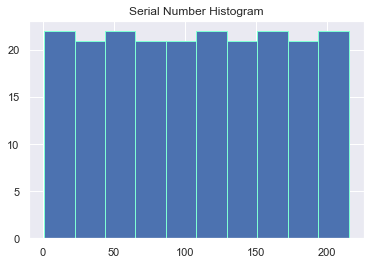

In [10]:
plt.hist(datam["sl_no"], edgecolor="#7FFFD4")
plt.title("Serial Number Histogram")

Text(0.5, 1.0, 'Gender Countplot')

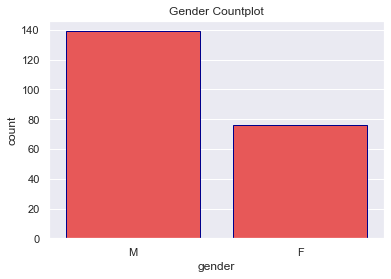

In [11]:
sns.countplot(datam['gender'], color="#FF4040", edgecolor="#00008B")
plt.title("Gender Countplot")

Text(0.5, 1.0, 'Senior Seconday Percentage Histogram')

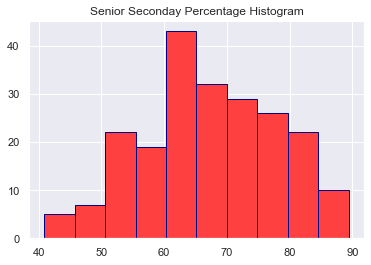

In [12]:
plt.hist(datam["ssc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Percentage Histogram")

Text(0.5, 1.0, 'Senior Seconday Board Countplot')

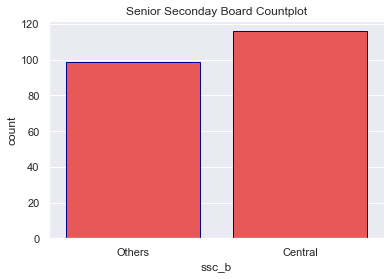

In [13]:
sns.countplot(datam["ssc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Board Countplot")

Text(0.5, 1.0, 'Higher Seconday Percentage Histogram')

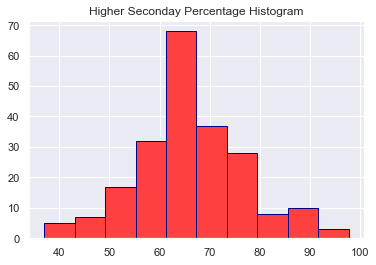

In [14]:
plt.hist(datam["hsc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Percentage Histogram")

Text(0.5, 1.0, 'Higher Seconday Board Countplot')

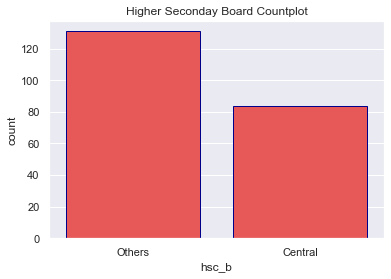

In [15]:
sns.countplot(datam["hsc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Board Countplot")

Text(0.5, 1.0, 'Higher Seconday Stream Countplot')

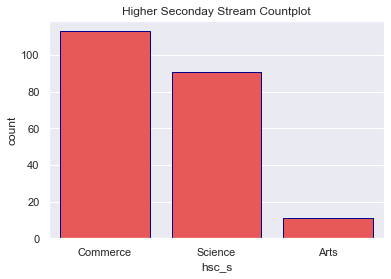

In [16]:
sns.countplot(datam["hsc_s"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Stream Countplot")

Text(0.5, 1.0, 'Degree percentage Histogram')

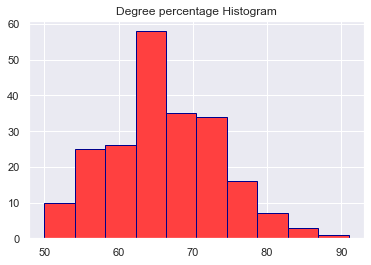

In [17]:
plt.hist(datam["degree_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Degree percentage Histogram")

Text(0.5, 1.0, 'Degree Type countplot')

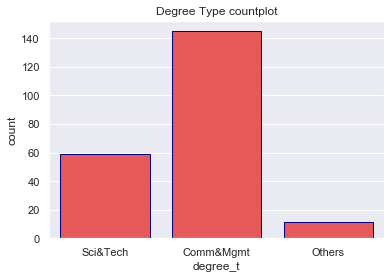

In [18]:
sns.countplot(datam["degree_t"], color="#FF4040", edgecolor="#00008B")
plt.title("Degree Type countplot")

In [19]:
#lets make a copy of dataset so that we have an original intact
datam1=datam.copy(deep=True)

In [20]:
"""  #Task 1:

1) Develop an estimated multiple linear regression equation with mbap as response variable 
and sscp & hscp as the two predictor variables. 
Interpret the regression coefficients and check whether they are significant based on the summary output """

'  #Task 1:\n\n1) Develop an estimated multiple linear regression equation with mbap as response variable \nand sscp & hscp as the two predictor variables. \nInterpret the regression coefficients and check whether they are significant based on the summary output '

In [21]:
""" #Task 2
2) Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better. 
(i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.
(ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables. 
"""

' #Task 2\n2) Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better. \n(i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.\n(ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables. \n'

In [22]:
""" #Task 3
3) Show the functional form of a multiple regression model. 
Build a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables. 
Divide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. 
Show the model summary and interpret the p-values of the regression coefficients. 
Remove any insignificant variables and rebuild the model. 
Use this model for prediction on the test set and 
show the first few observations’ actual value of the test set in comparison to the predicted value."""

' #Task 3\n3) Show the functional form of a multiple regression model. \nBuild a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables. \nDivide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. \nShow the model summary and interpret the p-values of the regression coefficients. \nRemove any insignificant variables and rebuild the model. \nUse this model for prediction on the test set and \nshow the first few observations’ actual value of the test set in comparison to the predicted value.'

## Task 1

#### Here mba_p is a dependent variable and ssc_p & hsc_p are independent. So 1st we will plot scatter plot to see, wherther they have some sort of relation or not 

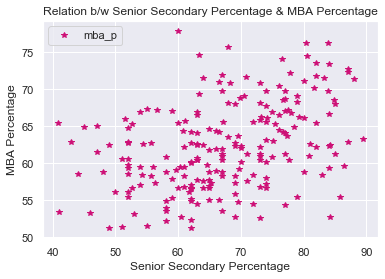

In [23]:
datam1.plot('ssc_p','mba_p',color="#CD1076",style="*")
plt.title("Relation b/w Senior Secondary Percentage & MBA Percentage")
plt.xlabel("Senior Secondary Percentage")
plt.ylabel("MBA Percentage")
plt.show()

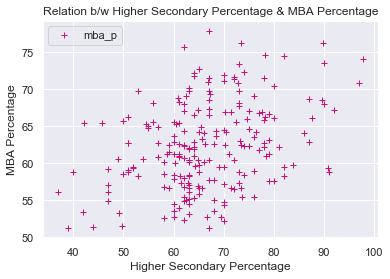

In [24]:
datam1.plot('hsc_p','mba_p',color="#CD1076",style="+")
plt.title("Relation b/w Higher Secondary Percentage & MBA Percentage")
plt.xlabel("Higher Secondary Percentage")
plt.ylabel("MBA Percentage")
plt.show()

#### Well, there is some sort of relation there, thats for sure. So now we will try to build the model (Not so linear though, still)

In [25]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.formula.api import ols

In [28]:
#First we will use LinearRegression
x=datam1[['ssc_p','hsc_p']]
y=datam1['mba_p']

In [29]:
reg=LinearRegression()
result=reg.fit(x,y)

In [30]:
dir(result)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [31]:
result.coef_

array([0.15103446, 0.1131833 ])

In [32]:
result.intercept_

44.60524831226684

In [33]:
#Now we will use statsmodel to do the same
res=ols(formula="mba_p ~ ssc_p+hsc_p", data=datam1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mba_p   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     23.89
Date:                Mon, 25 May 2020   Prob (F-statistic):           4.40e-10
Time:                        14:45:26   Log-Likelihood:                -661.89
No. Observations:                 215   AIC:                             1330.
Df Residuals:                     212   BIC:                             1340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6052      2.587     17.243      0.000      39.506      49.704
ssc_p          0.1510      0.039      3.883      0.000       0.074       0.228
hsc_p          0.1132      0.039      2.928      0.004       0.037       0.189
==============================================================================
Omnibus:                        3.143   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.890
Skew:                           0.209   Prob(JB):                        0.236
Kurtosis:                       2.616   Cond. No.                         684.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

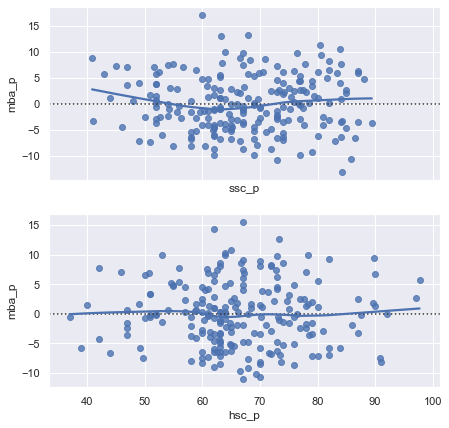

In [47]:
#ploting the residual plot
f, axes = plt.subplots(2, figsize=(7, 7), sharex=True)
sns.residplot(datam1['ssc_p'],y,lowess=True, ax=axes[0])
sns.residplot(datam1['hsc_p'],y,lowess=True,ax=axes[1])

In [48]:
"""
A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. 
If the points in a residual plot are randomly dispersed around the horizontal axis, 
a linear regression model is appropriate for the data"""

'\nA residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. \nIf the points in a residual plot are randomly dispersed around the horizontal axis, \na linear regression model is appropriate for the data'

#### By now we saw that our model is somewhat right, as residual plot is also good.

# Task 2

#### here mba_p is dependent variable, ssc_p, hsc_p and degree_p are independent. Above, we have seen the relation of ssc_p & hsc_p with mba_p. now we will see the relation b/w degree_p & mba_p

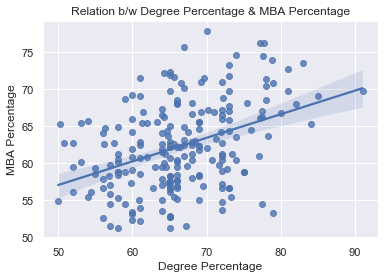

In [58]:
sns.regplot(datam1['degree_p'], datam1['mba_p'])
plt.title("Relation b/w Degree Percentage & MBA Percentage")
plt.xlabel("Degree Percentage")
plt.ylabel("MBA Percentage")
plt.show()

#### Well, there is some sort of relation there, thats for sure

### Task 2.1 mba_p on ssc_p & degree_p

In [59]:
res1=ols(formula="mba_p ~ ssc_p+degree_p", data=datam1).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mba_p   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     27.08
Date:                Mon, 25 May 2020   Prob (F-statistic):           3.36e-11
Time:                        15:17:07   Log-Likelihood:                -659.29
No. Observations:                 215   AIC:                             1325.
Df Residuals:                     212   BIC:                             1335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1887      3.296     11.891      0.000      32.693      45.685
ssc_p          0.1304      0.039      3.327      0.001       0.053       0.208
degree_p       0.2157      0.058      3.740      0.000       0.102       0.329
==============================================================================
Omnibus:                        3.536   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.031
Skew:                           0.196   Prob(JB):                        0.220
Kurtosis:                       2.570   Cond. No.                         880.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 2.2 mba_p on hsc_p & degree_p

In [61]:
res2=ols(formula="mba_p ~ hsc_p+degree_p", data=datam1).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  mba_p   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     26.81
Date:                Mon, 25 May 2020   Prob (F-statistic):           4.16e-11
Time:                        15:19:39   Log-Likelihood:                -659.50
No. Observations:                 215   AIC:                             1325.
Df Residuals:                     212   BIC:                             1335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2980      3.360     11.397      0.000      31.674      44.922
hsc_p          0.1188      0.036      3.259      0.001       0.047       0.191
degree_p       0.2426      0.054      4.492      0.000       0.136       0.349
==============================================================================
Omnibus:                        5.164   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.837
Skew:                           0.199   Prob(JB):                        0.147
Kurtosis:                       2.480   Cond. No.                         889.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 2.3 Comapring R-Value from both the models

In [63]:
print("R2 value of model1(ssc_p & degree_P)= {0}".format(res1.rsquared))
print("R2 value of model2(hsc_p & degree_P)= {0}".format(res2.rsquared))

R2 value of model1(ssc_p & degree_P)= 0.20348122153002757
R2 value of model2(hsc_p & degree_P)= 0.2018749243488065


#### As we can see that model1 is having bigger R2-value and hence it is more appropriate & better

# Task 3

### here we have mba_p as dependent variable & ssc_p, hsc_p & degree_p as independent variables

In [64]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
#making independet & dependent variables
X=datam1[['ssc_p','hsc_p','degree_p']]
Y=datam1['mba_p']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1001)
#From Doc:
#If int, random_state is the seed used by the random number generator; 
#If random_state instance, random_state is the random number generator; 
#If None, the random number generator is the RandomState instance used by np.random.

In [71]:
Regress=LinearRegression()
Regress.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
Regress.coef_

array([0.13999605, 0.09707612, 0.12917183])

In [74]:
Regress.intercept_

38.03640753430686

In [75]:
ypredict=Regress.predict(X_test)

In [88]:
# now lets compare
datapredict = pd.DataFrame({'Actual': Y_test, 'Predicted': ypredict})

In [89]:
datapredict

,Actual,Predicted
16,62.54,61.756270
177,70.81,67.877077
179,72.14,63.433803
44,69.70,66.365578
169,65.48,58.436366
102,61.31,63.521431
172,52.64,61.120157
77,57.65,63.158413
185,71.43,67.420943
12,65.04,58.351578


In [91]:
#As we have so many values, we will be showing Actual VS Predicted of 1st 10
datapredict1=datapredict.head(10)
datapredict1

,Actual,Predicted
16,62.54,61.756270
177,70.81,67.877077
179,72.14,63.433803
44,69.70,66.365578
169,65.48,58.436366
102,61.31,63.521431
172,52.64,61.120157
77,57.65,63.158413
185,71.43,67.420943
12,65.04,58.351578


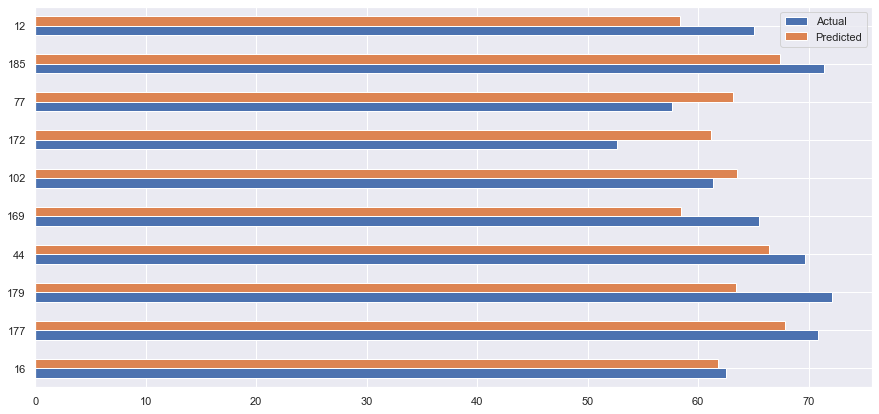

In [97]:
datapredict1.plot(kind='barh', figsize=(15,7))